<a href="https://colab.research.google.com/github/JenBanks8585/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module3-dimensionality-reduction/Jen_Banks_LS_DS_133_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update ({'font.size':14})

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

If a relation does not pass the vertical line test, that means for the same value of the domain, it maps to more than one value of the range. For instance, it will not make sense for a house on sale being sold for $\$400,000$ and at the same time also being sold for $\$350,000$.

On a lighter side, one of the examples of a relation that is not a function is Schrodinger's cat, where the cat can be both alive and dead, until the box is opened. 

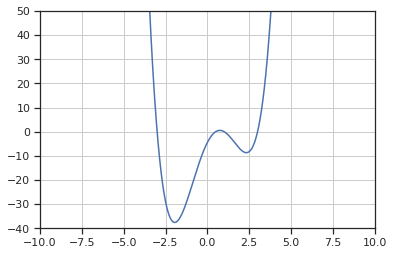

In [186]:
# Creating a polynomial with degree= 4, this is a function
# Using the verticals of the grid for vertical line test

x=np.arange(-8,15,.01)
y=(x-.5)*(x+3)*(x-1)*(x-3)

plt.xlim(-10, 10)
plt.ylim(-40, 50)

plt.grid()

plt.plot(x,y);

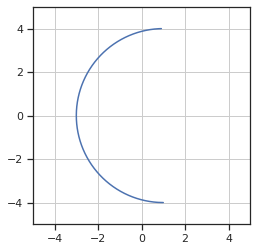

In [187]:
#Creating half a circle which is not a function

# Using the verticals of the grid for vertical line test

y=np.arange(-4,4,.001)
x=-((16-y**2)**.5) + 1

plt.xlim(-5,5)
plt.ylim(-5,5)
plt.gca().set_aspect("equal")
plt.grid()

plt.plot(x,y);

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 1 is not a function because domain = 1, is repeated

Relation 2 is a function because every single element in its domain is unique

Relation 2 is not a function because the 9 is mapped towards two values in its range.

Relation 4 is not a function, same reason as relations 1 and 3.

Relation 5 is not a function, because one element in the domain is mapped to all elements in its range.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Answer:

In function m, its domain has 3 dimensions and its range also has 3 dimensions

In function n, its domain has 4 dimensions and its range has 2 dimensions

In [188]:
#Consider given function g(x1,x2,x3)=(x1+x2, x1+x3, x2+x3)

#Arbitrary 3D points
points= [(1,2,3),(4,5,6),(7,8,9)]

#Creating a function that will produce the new points

Maped_points=[]
def g(z):
  for point in points:
    return [(np.sum([z[0][0],z[0][1]], axis = 0),
           np.sum([z[0][0],z[0][2]], axis = 0),
           np.sum([z[0][1],z[0][2]], axis = 0)),
           (np.sum([z[1][0],z[1][1]], axis = 0),
           np.sum([z[1][0],z[1][2]], axis = 0),
           np.sum([z[1][1],z[1][2]], axis = 0)),
           (np.sum([z[2][0],z[2][1]], axis = 0),
           np.sum([z[2][0],z[2][2]], axis = 0),
           np.sum([z[2][1],z[2][2]], axis = 0))]
g(points)



[(3, 4, 5), (9, 10, 11), (15, 16, 17)]

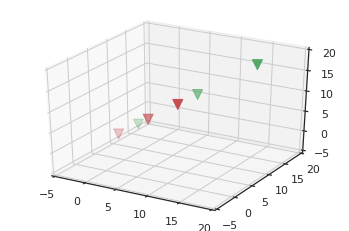

In [189]:
from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure()
ax=fig.add_subplot(111,projection= '3d')

#Original points
x=[1,4,7]
y=[2,5,8]
z=[3,6,9]

#transformed points
x2=[3,9,15]
y2=[4,10,16]
z2=[5,11,17]

plt.xlim(-5,20)
plt.ylim(-5,20)
ax.set_zlim3d(-5, 20)

ax.scatter(x,y,z, c='r', marker='v', s = 100);    #original
ax.scatter(x2,y2,z2, c='g', marker='v', s = 100); #transformed


## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [228]:
# Consider original matrix p

p=np.array([[1, 3],[2, -1]])

#Consider an iput vector k
k=np.array([[3], [-5]])

# Transformtion function for vector p

def f(vect):
  x1=vect[0][0]
  x2=vect[1][0]
  output_row1=np.array([x1+3*x2])
  output_row2=np.array([2*x2-x1])
  output_vect=np.array([output_row1,output_row2])
  return output_vect

p_i_hat=np.array([[1],[0]])
p_j_hat=np.array([[0],[1]])

# Turning the vectors in a matrix
Tp= np.column_stack([f(p_i_hat),f(p_j_hat)])

print('transformed p_i_hat', '\n', f(p_i_hat))
print(' ')
print('transformed p_j_hat', '\n', f(p_j_hat))
print(' ')
print('Original matrix p', '\n', p)
print(' ')
print('input vector k', '\n', k)
print(' ')
print('Transpormed matrix Tp', '\n', Tp)

transformed p_i_hat 
 [[ 1]
 [-1]]
 
transformed p_j_hat 
 [[3]
 [2]]
 
Original matrix p 
 [[ 1  3]
 [ 2 -1]]
 
input vector k 
 [[ 3]
 [-5]]
 
Transpormed matrix Tp 
 [[ 1  3]
 [-1  2]]


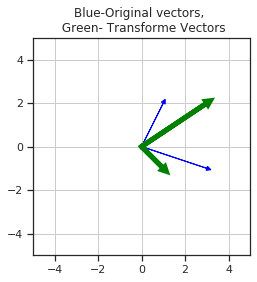

In [231]:
# Plot the original and transformed Vectors
plt.arrow(0,0, 1, 2,head_width=.2, head_length=0.2, color ='blue')
plt.arrow(0,0, 3, -1,head_width=.2, head_length=0.2, color ='blue')
plt.arrow(0,0, 1, -1,head_width=.2, head_length=0.2,linewidth= 5, color ='green')
plt.arrow(0,0, 3, 2,head_width=.2, head_length=0.2,linewidth=5, color ='green')

plt.grid()
plt.xlim(-5,5)          
plt.ylim(-5,5)
plt.gca().set_aspect("equal")

plt.title("Blue-Original vectors, \n Green- Transforme Vectors")
plt.show()

In [191]:
# Passing input vector on function f
f_k= f(k)

#Manual mutiplication to check
manual_k= np.matmul(Tp,k)

print('f(k)', '\n', f_k)
print(' ')
print('manually multiplying', '\n', manual_k)

f(k) 
 [[-12]
 [-13]]
 
manually multiplying 
 [[-12]
 [-13]]


In [192]:
# Consider original matrix q

q=np.array([[4, 1, 2],[2, -1, 1],[5, -2, 1]])

#Consider an iput vector r
r=np.array([[3], [-5], [6]])


# Transformation function for vector q

def h(vect):
  y1=vect[0][0]
  y2=vect[1][0]
  y3=vect[2][0]
  output_row1=np.array([4*y1+y2+2*y3])
  output_row2=np.array([2*y2-y1+3*y3])
  output_row3=np.array([5*y1-2*y3+y2])
  output_vect=np.array([output_row1,output_row2, output_row3])
  return output_vect

q_i_hat=np.array([[1],[0],[0]])
q_j_hat=np.array([[0],[1],[0]])
q_k_hat=np.array([[0],[0],[1]])

# Turning the vectors in a matrix
Tq= np.column_stack([h(q_i_hat),h(q_j_hat), h(q_k_hat)])

print('transformed q_i_hat', '\n', h(q_i_hat))
print(' ')
print('transformed q_j_hat', '\n', h(q_j_hat))
print(' ')
print('transformed q_k_hat', '\n', h(q_k_hat))
print(' ')
print('Original matrix q', '\n', q)
print(' ')
print('input vector r', '\n', r)
print(' ')
print('Transformed matrix Tq', '\n', Tq)

transformed q_i_hat 
 [[ 4]
 [-1]
 [ 5]]
 
transformed q_j_hat 
 [[1]
 [2]
 [1]]
 
transformed q_k_hat 
 [[ 2]
 [ 3]
 [-2]]
 
Original matrix q 
 [[ 4  1  2]
 [ 2 -1  1]
 [ 5 -2  1]]
 
input vector r 
 [[ 3]
 [-5]
 [ 6]]
 
Transformed matrix Tq 
 [[ 4  1  2]
 [-1  2  3]
 [ 5  1 -2]]


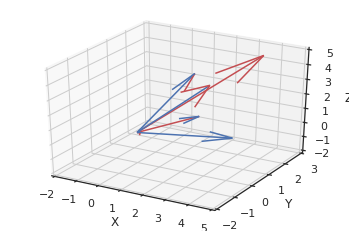

In [240]:
# Plotting Original and transformed Vectors on a 3d graph.
from mpl_toolkits.mplot3d import Axes3D

#Original vectors
R1=np.array([[0, 0, 0, 4, 2, 5]])
R2=np.array([[0, 0, 0, 1, -1, 1]])
R3=np.array([[0, 0, 0, 2, 1, 1]])

#Transformed vectors
T1=np.array([[0, 0, 0, 4, -1, 5]])
T2=np.array([[0, 0, 0, 1, 2, 3]])
T3=np.array([[0, 0, 0, 2, 3, -2]])


colors = ['r','r','r', 'b','b','b'] 

X, Y, Z, U, V, W = zip(*R1, *R2, *R3, *T1, *T2, *T3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, color=colors, length=1)
ax.set_xlim([-2, 5])
ax.set_ylim([-2, 3])
ax.set_zlim([-2,5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [193]:
# Passing input vector on function h
h_r= h(r)

#Manual mutiplication to check
manual_r= np.matmul(Tq,r)

print('h(r)', '\n', h_r)
print(' ')
print('manually multiplying', '\n', manual_r)

h(r) 
 [[19]
 [ 5]
 [-2]]
 
manually multiplying 
 [[19]
 [ 5]
 [-2]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are vectors that stay on their span even after being subjected to some linear transformations. Eigenvalues are scalar quantities that represent the dilation factor applied to either stretch or shrink a given vector. 

In [194]:
#EXAMPLE:
#Creating a 2x2 matrix, linear transformations

P = np.array([[2,6],[4,7]])
P_df=pd.DataFrame(P)
print('P_df:','\n',P_df)

# Determining Eigenvectors, v and Eigenvalues, w
(w,v)=np.linalg.eig(P)
print('Eigenvalues:', '\n', w)
print('Eigenvectors:', '\n', v)

P_df: 
    0  1
0  2  6
1  4  7
Eigenvalues: 
 [-1. 10.]
Eigenvectors: 
 [[-0.89442719 -0.6       ]
 [ 0.4472136  -0.8       ]]


# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

When faced with a high number of features, it is very difficult to see the relation between these features.  As someone who is tasked to analyze them, you could just easily feel drowned with excessive amount of data points.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

As a rule of thumb, the number of observations is advised to be at least 5 times the number of features. 

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [195]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [196]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL            object
AGE1                int64
METRO3             object
REGION             object
LMED                int64
                    ...  
FMTINCRELAMICAT    object
FMTASSISTED        object
FMTBURDEN          object
FMTREGION          object
FMTSTATUS          object
Length: 99, dtype: object

In [197]:
# check for null values
national.isnull().sum().any()

False

In [198]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [199]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [200]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [201]:
# Now we only have numeric columns (ints and floats)
national_processed.dtypes

CONTROL            int32
AGE1               int64
METRO3              int8
REGION              int8
LMED               int64
                   ...  
FMTINCRELAMICAT     int8
FMTASSISTED         int8
FMTBURDEN           int8
FMTREGION           int8
FMTSTATUS           int8
Length: 99, dtype: object

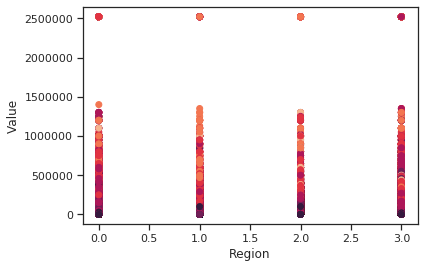

In [202]:
### Your Code Here
plt.scatter(national_processed['REGION'],national_processed['VALUE'], c=national_processed['BEDRMS'], )
plt.xlabel('Region')
plt.ylabel('Value')


plt.show()

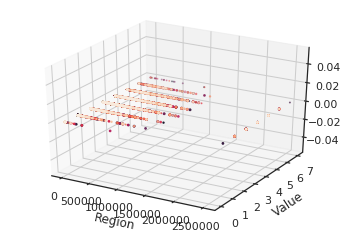

In [203]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure().gca(projection='3d')
plt.scatter(national_processed['VALUE'],national_processed['BEDRMS'],national_processed['REGION'], c=national_processed['CONTROL'],  )
plt.xlabel('Region')
plt.ylabel('Value')
ax.set_zlabel('CONTROL')

ax.set_zlim([-15, 40])

plt.show()


In [0]:
# Importing StandardScaler and grabbing featured columns

from sklearn.preprocessing import StandardScaler
feature_cols=national_processed.columns[:]


In [205]:
# Normalizing the values in the chosen features

x=national_processed.loc[:,feature_cols].values
x=StandardScaler().fit_transform(x)

#Checking mean and std

print('{:.2f}'.format(np.mean(x)))
print(np.std(x))


0.00
0.9949366763261824


In [206]:
#Converting the normalized data into a dataframe

normal_nat_processed=pd.DataFrame(x,columns=feature_cols)
normal_nat_processed.head()

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,-1.732024,1.488075,0.608784,-1.327872,0.454953,-0.528766,-0.444470,-0.445262,-0.553127,-0.681429,-0.603700,1.504196,-0.271749,-0.142292,-0.409728,-0.26814,-0.518234,-0.253701,0.193641,0.989256,-0.345248,-0.582421,-0.001189,-0.538157,-0.626460,-0.858681,-0.108318,1.002403,-0.524572,-0.489431,-0.511002,-0.535753,-0.693001,-0.774303,0.454953,-0.444470,-0.445262,-0.553127,-0.100276,-0.139349,...,0.448213,-0.508180,-0.588115,-0.524716,-1.139197,-0.294200,0.432580,-0.487463,-0.685212,-0.580668,-0.896546,-0.272848,0.472927,-0.526199,-0.452728,-0.001189,-0.706647,1.728565,-0.627170,-0.612264,-0.858681,0.676610,0.649838,0.615731,0.703541,0.071352,-0.518776,-0.588115,-0.685212,-0.452728,-1.091609,-0.956874,-1.028145,-1.139197,-0.896546,-0.779119,-0.709278,0.549473,-0.462107,0.0
1,-1.731970,0.088812,2.184270,0.576698,-0.991324,-0.163391,-0.123184,-0.122457,-0.043566,1.140132,1.224839,0.515773,-0.271749,-0.142292,-0.048319,-0.26814,-0.518234,-0.253701,0.193641,0.213178,0.823743,0.827974,-0.001189,-0.584987,-0.626460,-0.858681,0.478101,-0.065553,-0.214100,-0.155728,-0.190289,-0.235410,1.204959,-0.774303,-0.991324,-0.123184,-0.122457,-0.043566,0.108920,-0.207233,...,0.448213,-0.135192,0.796007,-0.102732,0.682587,-0.316521,0.432580,-0.084420,0.716067,-0.203481,0.115986,-0.399199,0.167739,-0.199905,-0.452728,-0.001189,-0.706647,0.467274,-0.627170,1.390040,-0.858681,-0.080937,0.649838,0.615731,-0.052382,0.778350,0.859820,0.796007,0.716067,-0.452728,0.926091,0.024966,-0.077478,0.682587,0.115986,1.171883,-0.709278,-0.544709,-0.462107,0.0
2,-1.731917,0.219993,2.184270,0.576698,-0.991324,-0.163391,-0.892063,-0.892949,-0.901606,-0.071564,1.224839,0.705854,-0.271749,-0.142292,0.031993,-0.26814,-0.518234,-0.253701,0.718708,0.263808,0.044416,-0.448652,-0.001189,0.349585,-0.626460,-0.858681,-0.185141,-0.208710,-0.198696,-0.116072,-0.164791,-0.229295,-0.260945,-0.774303,-0.991324,-0.892063,-0.892949,-0.901606,-0.443533,-0.201751,...,0.448213,-0.099583,0.796007,-0.053669,0.682587,-0.035118,0.432580,-0.028753,0.716067,-0.196046,0.115986,-0.129488,0.472927,-0.191508,-0.452728,-0.001189,-0.706647,0.467274,-0.627170,1.390040,-0.858681,0.676610,0.649838,0.615731,0.703541,0.071352,0.859820,0.796007,0.716067,-0.452728,-0.082759,0.024966,0.397856,0.682587,0.115986,0.001282,-0.709278,1.643655,-0.462107,0.0
3,-1.731863,0.832170,2.184270,0.576698,-0.991324,-0.546527,-0.892063,-0.892949,-0.901606,-0.280162,0.310570,0.705854,-0.271749,-0.142292,0.232776,-0.26814,-0.518234,-0.253701,0.193641,0.384872,0.044416,-0.391586,-0.001189,-0.796742,-0.626460,-0.858681,-0.031494,0.019197,0.031870,0.106710,0.062991,0.003272,-0.693001,-0.774303,-0.991324,-0.892063,-0.892949,-0.901606,-0.443533,-0.634993,...,0.448213,0.425176,0.796007,0.351204,1.138032,0.296510,0.432580,0.486190,0.716067,0.220677,0.622252,0.212108,0.472927,0.336529,0.923669,-0.001189,-0.706647,0.467274,-0.627170,0.388888,-0.858681,0.676610,0.649838,0.615731,0.703541,0.778350,0.859820,0.796007,0.716067,0.923669,-0.082759,1.006807,1.348523,1.138032,0.622252,0.001282,-0.709278,-0.544709,-0.462107,0.0
4,-1.731809,-0.960634,-0.966702,0.5

In [207]:
# Applying PCA
from sklearn.decomposition import PCA

# Choosing 4 components
pca_norm=PCA(n_components=4)
pca_data=pca_norm.fit_transform(x)

#Converting to a dataframe
final_df=pd.DataFrame(pca_data, columns=['comp1', 'comp2', 'comp3', 'comp4'])
final_df.head()

,comp1,comp2,comp3,comp4
0,-2.576570,-1.376127,-1.253835,-0.619881
1,2.040643,-0.988061,-2.237999,-2.987403
2,1.215270,0.370168,-3.248606,-2.123899
3,2.821837,1.723711,-4.375157,-1.479343
4,-1.570106,-0.878362,-3.307062,0.785881


In [208]:
final_df['comp2'].min(),final_df['comp2'].max()

(-8.423870628330269, 29.869730909468533)

In [209]:
#Checking what percentage of the orignal data is captured in each component
pca_norm.explained_variance_ratio_

array([0.34050542, 0.14442164, 0.10287616, 0.07245401])

In [210]:
# Addung up the variances

sum(pca_norm.explained_variance_ratio_)

0.6602572255418071

In [211]:
#Percentage of data lost in PCA

1-(sum(pca_norm.explained_variance_ratio_))

0.3397427744581929

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


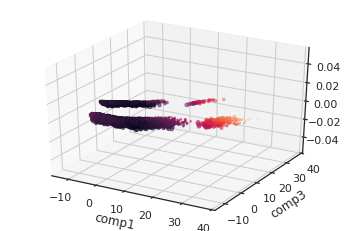

In [212]:
plt.figure().gca(projection='3d')
plt.scatter(final_df['comp1'],
            final_df['comp2'],
            final_df['comp3'], 
            c=final_df['comp4'],
            alpha=0.5,
            
            )
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.ylabel('comp3');

plt.xlim(-15, 40)
plt.ylim(-15, 40)
ax.set_zlim(-15, 40)

plt.show();

In [213]:
# Determining correlation between features
final_df.corr()

,comp1,comp2,comp3,comp4
comp1,1.000000e+00,1.644362e-16,1.071609e-16,-3.044729e-16
comp2,1.644362e-16,1.000000e+00,1.362458e-16,-2.600777e-17
comp3,1.071609e-16,1.362458e-16,1.000000e+00,-4.539614e-16
comp4,-3.044729e-16,-2.600777e-17,-4.539614e-16,1.000000e+00


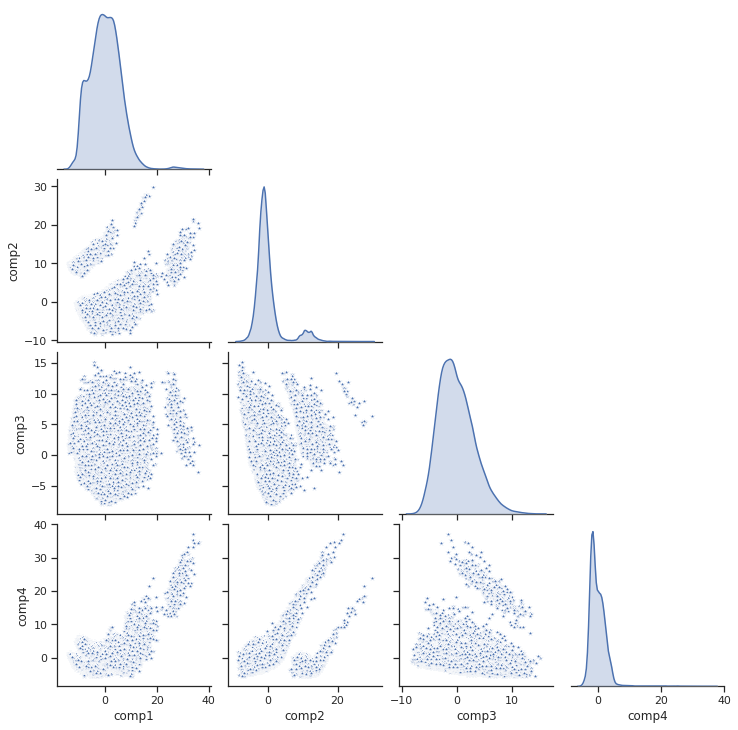

In [214]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)

sns.pairplot(final_df, 
             diag_kind='kde',
             palette="husl",
             corner=True,markers="*",
             hue_order=['comp1', 'comp2', 'comp3', 'comp4']);



# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)

##1) Perform further data exploration on the HADS national dataset

In [249]:
# Creating a copy of the original dataframe

HADS=national.copy()
HADS.head()

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [258]:
#Creating a subset dataframe from HADS
sub_HADS=HADS[['METRO3', 'REGION', 'BEDRMS','COSTMedRELPOVPCT', 'COSTMedRELFMRPCT', 'COSTMedRELAMIPCT', 'VALUE']]
sub_HADS.dtypes

METRO3               object
REGION               object
BEDRMS                int64
COSTMedRELPOVPCT    float64
COSTMedRELFMRPCT    float64
COSTMedRELAMIPCT    float64
VALUE                 int64
dtype: object

In [259]:
# check for number of categorical columns
cat_cols2 = sub_HADS.columns[sub_HADS.dtypes=='object']

sub_HADS[cat_cols2] = sub_HADS[cat_cols2].astype('category')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [260]:
# Replace all category cell values with their numeric category codes
for col in cat_cols2:
  sub_HADS[col] = sub_HADS[col].cat.codes

print(sub_HADS.shape)
sub_HADS.head()

(64535, 7)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,METRO3,REGION,BEDRMS,COSTMedRELPOVPCT,COSTMedRELFMRPCT,COSTMedRELAMIPCT,VALUE
0,2,0,2,222.339102,64.346936,37.077624,40000
1,4,2,4,174.909320,96.271680,65.388468,130000
2,4,2,4,276.153890,97.093197,65.946449,150000
3,4,2,3,404.382763,148.756610,97.224801,200000
4,0,2,2,195.972115,102.985075,55.308707,-6


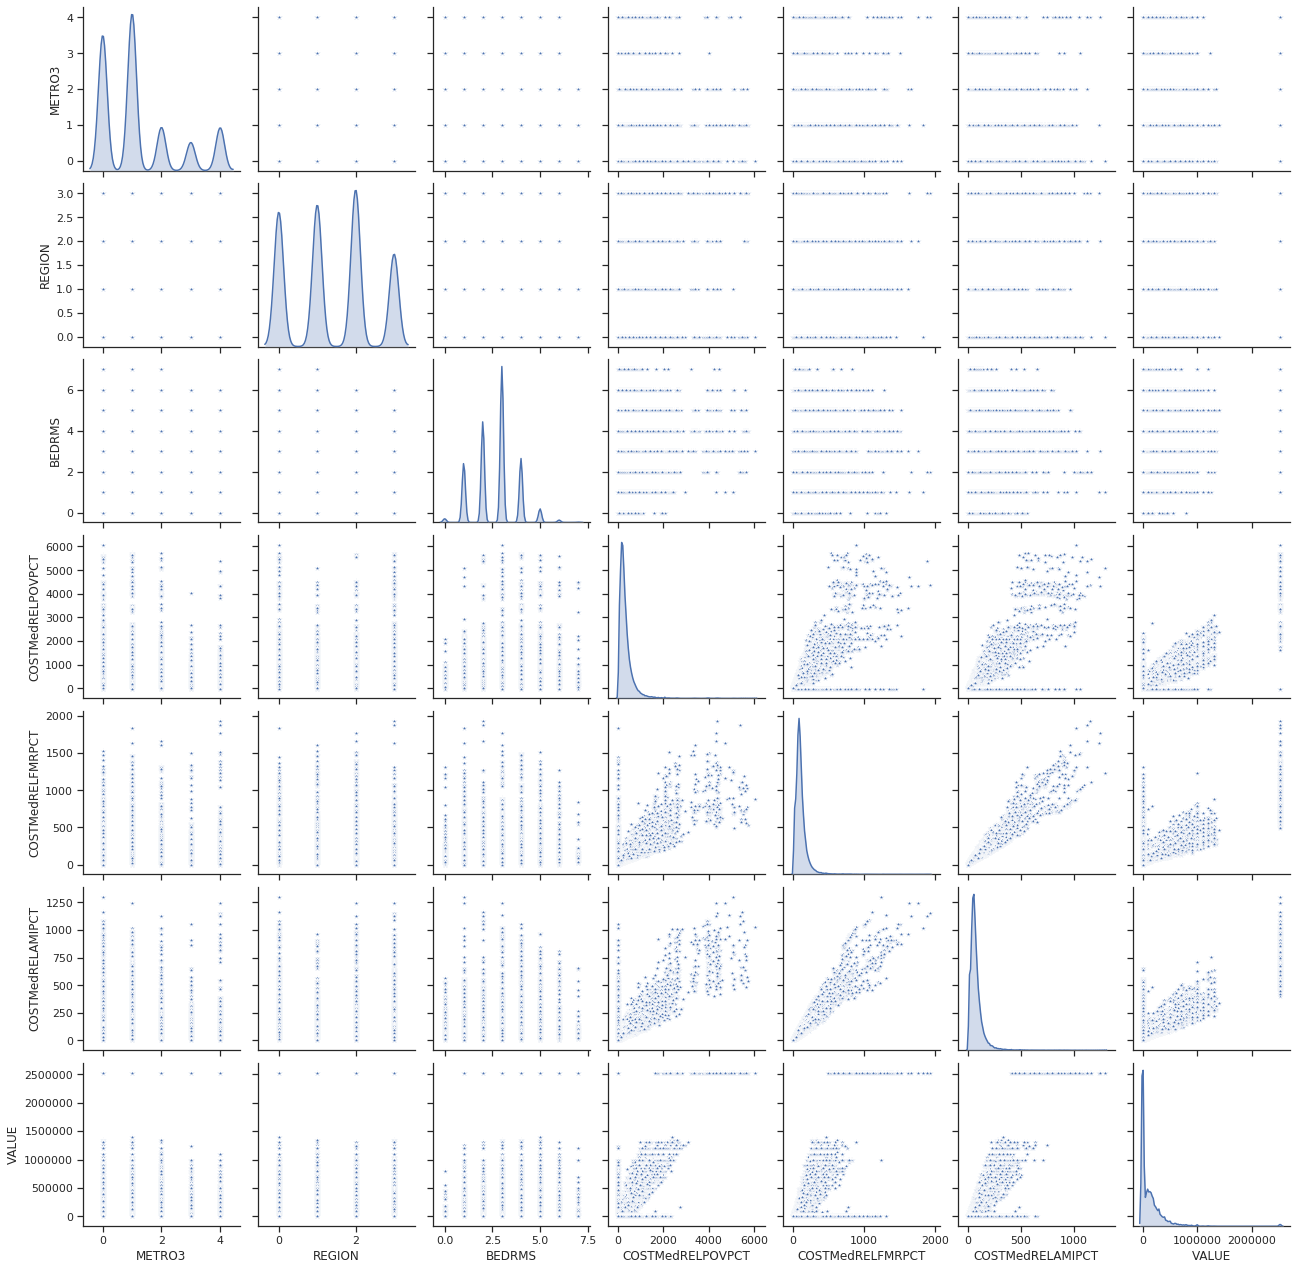

In [262]:
# Using pairplot to check for relationships between features 

sns.pairplot(sub_HADS, diag_kind='kde', markers="*");

## 2. Creating Scree Plot

In [215]:
# Choosing 4 components
pca_norm2=PCA(n_components=15)
pca_data2=pca_norm2.fit_transform(x)

#Converting to a dataframe
final_df2=pd.DataFrame(pca_data2, columns=['comp1', 'comp2', 'comp3', 'comp4','comp5', 'comp6', 'comp7', 'comp8','comp9', 'comp10', 'comp11', 'comp12','comp13', 'comp14', 'comp15'])
final_df2.head()

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,comp11,comp12,comp13,comp14,comp15
0,-2.576570,-1.376127,-1.253835,-0.619883,1.592858,-2.529626,-1.024199,2.038518,0.742992,-0.981528,-0.956299,-0.985287,-0.118482,2.116870,-0.224628
1,2.040643,-0.988062,-2.237999,-2.987400,2.160324,1.220843,1.076412,-0.681347,0.947803,-0.182297,-0.690133,0.672309,-0.316408,0.164577,0.062910
2,1.215270,0.370168,-3.248605,-2.123897,1.229954,-2.559983,0.984332,0.088361,-0.209781,-0.714933,-0.243202,1.169524,-0.138538,0.492813,0.359613
3,2.821837,1.723711,-4.375157,-1.479343,0.085330,-1.755041,0.710530,-0.064785,0.487165,-0.175283,-0.948209,0.274766,-0.084350,-0.605388,-0.058096
4,-1.570106,-0.878362,-3.307062,0.785883,-2.310405,3.881717,-0.646162,0.464899,-0.091789,0.439856,0.679280,1.297402,-2.182478,0.879898,-1.270705


In [216]:
#Checking what percentage of the orignal data is captured in each component
pca_norm2.explained_variance_ratio_

array([0.34050542, 0.14442164, 0.10287616, 0.07245401, 0.05166581,
       0.04006691, 0.02785863, 0.02220394, 0.02016919, 0.01770145,
       0.01452759, 0.0129949 , 0.01155558, 0.01057457, 0.01032193])

In [217]:
# Addung up the variances

sum(pca_norm2.explained_variance_ratio_)

0.8998977267011706

In [218]:
# Checking for number of components
num_comp=len(pca_norm2.explained_variance_ratio_)
num_comp

15

In [219]:
# Creating an array as long as thenumber of components
ind_num_com=np.arange(num_comp)
ind_num_com

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [220]:
# Converting the variamce ratios into an array of values

value=pca_norm2.explained_variance_ratio_
value

array([0.34050542, 0.14442164, 0.10287616, 0.07245401, 0.05166581,
       0.04006691, 0.02785863, 0.02220394, 0.02016919, 0.01770145,
       0.01452759, 0.0129949 , 0.01155558, 0.01057457, 0.01032193])

In [221]:
# Computing the cumulative values
cumValue=np.cumsum(value)
cumValue

array([0.34050542, 0.48492705, 0.58780321, 0.66025723, 0.71192304,
       0.75198995, 0.77984858, 0.80205252, 0.82222171, 0.83992317,
       0.85445076, 0.86744566, 0.87900123, 0.8895758 , 0.89989773])

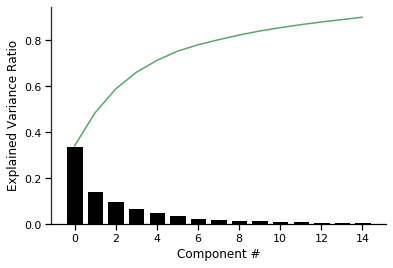

In [242]:
#Creating a bar graph of the variance values

fig=plt.figure()
fig.patch.set_facecolor('gray')
fig.patch.set_alpha(0)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('red')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.ylabel('Explained Variance Ratio', color= 'black')
plt.xlabel('Component #', color='black')

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('None')
ax.spines['right'].set_color('None')


plt.plot(ind_num_com, cumValue, c='g')
plt.bar(ind_num_com,value,color='black');